## Automatically annotated motion tracking identifies a distinct social behavioral profile following chronic social defeat stress - Part 1
Author: Joeri Bordes

# Settings and loading data

In [1]:
rm(list = ls())
# Load packages
library(plyr);
library(tidyverse);
library(ggplot2);
library(ggridges);
library(readxl);
library(writexl);
library(ggpubr);
library(DT);
library(gt);
library(Hmisc);
library(sciplot);
library(rstatix);
library(svglite);
library(MASS);

# Load functions
source("supervised_pipeline_aux_functions.R")

# General settings for all graphs
x_y_labelsize = 18
y_title = 18
line_sizes = 0.5
barwidth = 0.8
title_location = 0.5
title_size = 20

#Errorbar
errorbar_width = 0.1
errorbar_alpha = 0.8
sem_amount = 1
geomribbon_alpha = 0.3

#BW graph
line_plotsize = 1
point_thick = 2


# Set colors of the graph
#els_palette = c("#D9D1CE", "#A9CAFF")
els_palette = c("#237194", "#faa32b")
palette_posneg = c("#F42657", "#1E86E5")


── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::

Load data

In [2]:
# Load all data, including total duration DeepOF behavioral classifiers and other behaviors and physiological markers
all_data = read_excel("data/alldata.xlsx")
all_data = rename(all_data, animal_id = ID)
data_totalduration = read_excel("data/supervised_total_duration.xlsx") %>%  
dplyr::select(-c(B_following, W_following))

# Load data DeepOF supervised behavioral classifiers in duration timebins
data_timebinduration = read_excel("data/supervised_timebin_duration.xlsx") %>%
dplyr::select(-c(B_following, W_following)) %>%
rename(B_nose_to_tail = B_nose2tail) %>%
rename(B_nose_to_body = B_nose2body) %>%
rename(Sidebyside = sidebyside)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


# Figure 2 -  Classical  hallmarks  for  chronic  social  defeat  stres

## Figure 2B

### Statistics 2B

 Two way repeated measures ANOVA for bodyweight

In [3]:
# Prepare data
BW_data <- all_data %>%
dplyr::select(animal_id, condition, BW_day1, BW_day4, BW_day8, BW_day11, BW_day15, BW_day18, BW_day21) %>%
pivot_longer(., cols = c(BW_day1, BW_day4, BW_day8, BW_day11, BW_day15, BW_day18, BW_day21), names_to = "BW_day", values_to = "BW_measurement") %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day1', 1)) %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day4', 2)) %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day8', 3)) %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day11', 4)) %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day15', 5)) %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day18', 6)) %>%
mutate(BW_day = replace(BW_day, BW_day == 'BW_day21', 7))

Check normality of the data: Shapiro

In [4]:
BW_data %>%
group_by(condition, BW_day) %>%
shapiro_test(BW_measurement) %>%
add_significance()

condition   BW_day variable       statistic p          p.signif
1  Nonstressed 1      BW_measurement 0.9769686 0.74051382 ns      
2  Nonstressed 2      BW_measurement 0.9705530 0.55441633 ns      
3  Nonstressed 3      BW_measurement 0.9641156 0.39281868 ns      
4  Nonstressed 4      BW_measurement 0.9704509 0.55158618 ns      
5  Nonstressed 5      BW_measurement 0.9606635 0.32207563 ns      
6  Nonstressed 6      BW_measurement 0.9684364 0.49732681 ns      
7  Nonstressed 7      BW_measurement 0.9470178 0.14058933 ns      
8  Stressed    1      BW_measurement 0.9255641 0.03748400 *       
9  Stressed    2      BW_measurement 0.9918200 0.99732654 ns      
10 Stressed    3      BW_measurement 0.9756615 0.70221900 ns      
11 Stressed    4      BW_measurement 0.9790040 0.79849415 ns      
12 Stressed    5      BW_measurement 0.9403563 0.09299074 ns      
13 Stressed    6      BW_measurement 0.9871936 0.96845082 ns      
14 Stressed    7      BW_measurement 0.9738914 0.65011299 ns

General effect: Two-way repeated measures ANOVA

In [5]:
anova_test(BW_measurement ~ condition*BW_day, data = BW_data) %>%
  add_significance()

Coefficient covariances computed by hccm()



Effect           DFn DFd F      p        p<.05 ges      p.signif
1 condition        1   406  0.202 6.53e-01       0.000497 ns      
2 BW_day           6   406 13.581 4.59e-14 *     0.167000 ****    
3 condition:BW_day 6   406  6.129 3.65e-06 *     0.083000 ****

Post-hoc analysis of the condition (NS vs CSDS) at each time point

In [6]:
BW_data %>%
group_by(BW_day) %>%
anova_test(BW_measurement ~ condition) %>%
get_anova_table() %>%
adjust_pvalue(method = "bonferroni") %>%
add_significance()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



BW_day Effect    DFn DFd F      p     p<.05 ges      p.adj p.adj.signif
1 1      condition 1   58   4.084 0.048 *     0.066000 0.336 ns          
2 2      condition 1   58   6.359 0.014 *     0.099000 0.098 ns          
3 3      condition 1   58   6.546 0.013 *     0.101000 0.091 ns          
4 4      condition 1   58   1.521 0.222       0.026000 1.000 ns          
5 5      condition 1   58   0.035 0.852       0.000607 1.000 ns          
6 6      condition 1   58   5.030 0.029 *     0.080000 0.203 ns          
7 7      condition 1   58  11.570 0.001 *     0.166000 0.007 **

### Plot figure 2B

In [7]:
# Prepare the data
BW_data <- all_data %>%
  dplyr::select(condition, BW_day1, BW_day4, BW_day8, BW_day11, BW_day15, BW_day18, BW_day21) %>%
  pivot_longer(., cols = c(BW_day1, BW_day4, BW_day8, BW_day11, BW_day15, BW_day18, BW_day21), names_to = "BW_day", values_to = "BW_measurement") %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day1', 1)) %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day4', 2)) %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day8', 3)) %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day11', 4)) %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day15', 5)) %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day18', 6)) %>%
  mutate(BW_day = replace(BW_day, BW_day == 'BW_day21', 7))

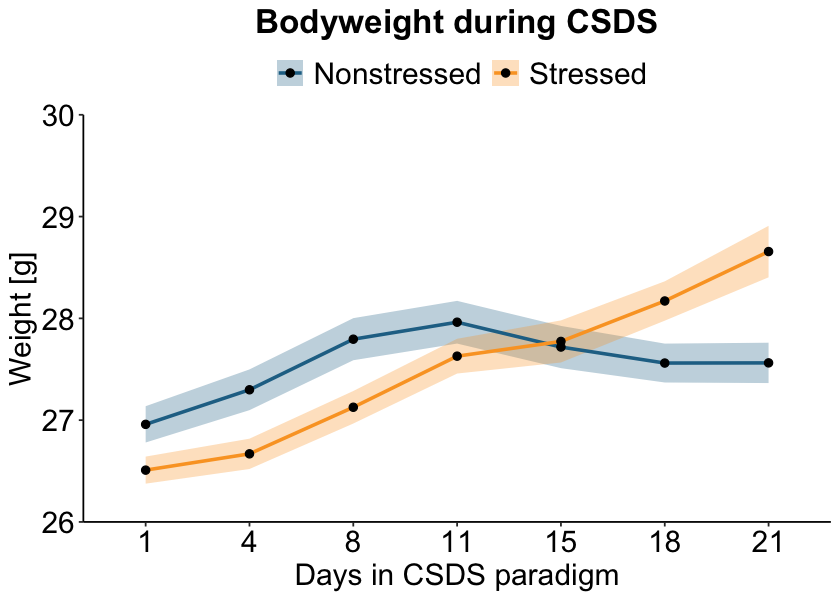

In [8]:
options(repr.plot.width=7, repr.plot.height=5)

# Figure 2B
yplot = 'Bodyweight during CSDS'
xlabels = c("1", "4", "8", "11","15","18","21")
ylabel_name = "Weight [g]"
xlabel_name = "Days in CSDS paradigm"
timeline_graph_standard(data = BW_data, ydata = BW_data$BW_measurement,
                        y_axe_limits = c(26, 30), y_axe_breaks = seq(26,30,1), palette = els_palette) 

## Figure 2C-F

### Statistics 2C-F

 Student's t-test for comparing the means

In [9]:
# Prepare data
stat_totdura_SI <- merge(all_data, data_totalduration, by=c("animal_id","condition")) %>%
dplyr::select(-c("Sample_name", "...1","animal_id")) %>%
pivot_longer(-condition, names_to = "variables", values_to = "data") %>%
filter(variables == 'Rel_Adrenal_weight' | variables == 'OF_Distance [m]'
       | variables == 'OF_Inner zone : time [s]' | variables == 'SA_ratio')

Check normality of the data: Shapiro

In [10]:
stat_totdura_SI %>%
  group_by(variables) %>%
  shapiro_test(data) %>%
  add_significance()

variables                variable statistic p            p.signif
1 OF_Distance [m]          data     0.9581899 0.0611248660 ns      
2 OF_Inner zone : time [s] data     0.9607381 0.0791472089 ns      
3 Rel_Adrenal_weight       data     0.9805747 0.5505725710 ns      
4 SA_ratio                 data     0.9024324 0.0004455234 ***

Check equality of the variance: Levene's test

In [11]:
stat_totdura_SI %>%
  group_by(variables) %>%
  levene_test(data ~ condition) %>%
  add_significance()

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


variables                df1 df2 statistic   p          p.signif
1 OF_Distance [m]          1   51  3.935464403 0.05267325 ns      
2 OF_Inner zone : time [s] 1   51  0.007337473 0.93207286 ns      
3 Rel_Adrenal_weight       1   50  1.189063214 0.28074589 ns      
4 SA_ratio                 1   50  0.537904462 0.46672750 ns

Figure2C-E (Adrenal weight, OF:total, OF:innerzone) : Parametric test Independent samples T-test

In [12]:
stat_totdura_SI %>%
group_by(variables) %>%
t_test(data ~ condition, var.equal = TRUE) %>%
add_significance() %>%
filter(variables != 'SA_ratio')

variables                .y.  group1      group2   n1 n2 statistic df
1 OF_Distance [m]          data Nonstressed Stressed 26 27  6.153986 51
2 OF_Inner zone : time [s] data Nonstressed Stressed 26 27  3.367294 51
3 Rel_Adrenal_weight       data Nonstressed Stressed 26 27 -5.003271 50
  p        p.signif
1 1.18e-07 ****    
2 1.45e-03 **      
3 7.35e-06 ****

Figure2F (SA_ratio) : Non-parametric test: Wilcox test

In [13]:
stat_totdura_SI %>%
group_by(variables) %>%
wilcox_test(data ~ condition) %>%
add_significance() %>%
filter(variables == 'SA_ratio')

variables .y.  group1      group2   n1 n2 statistic p      p.signif
1 SA_ratio  data Nonstressed Stressed 26 27 460       0.0262 *

### Plot figure 2C-F

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”


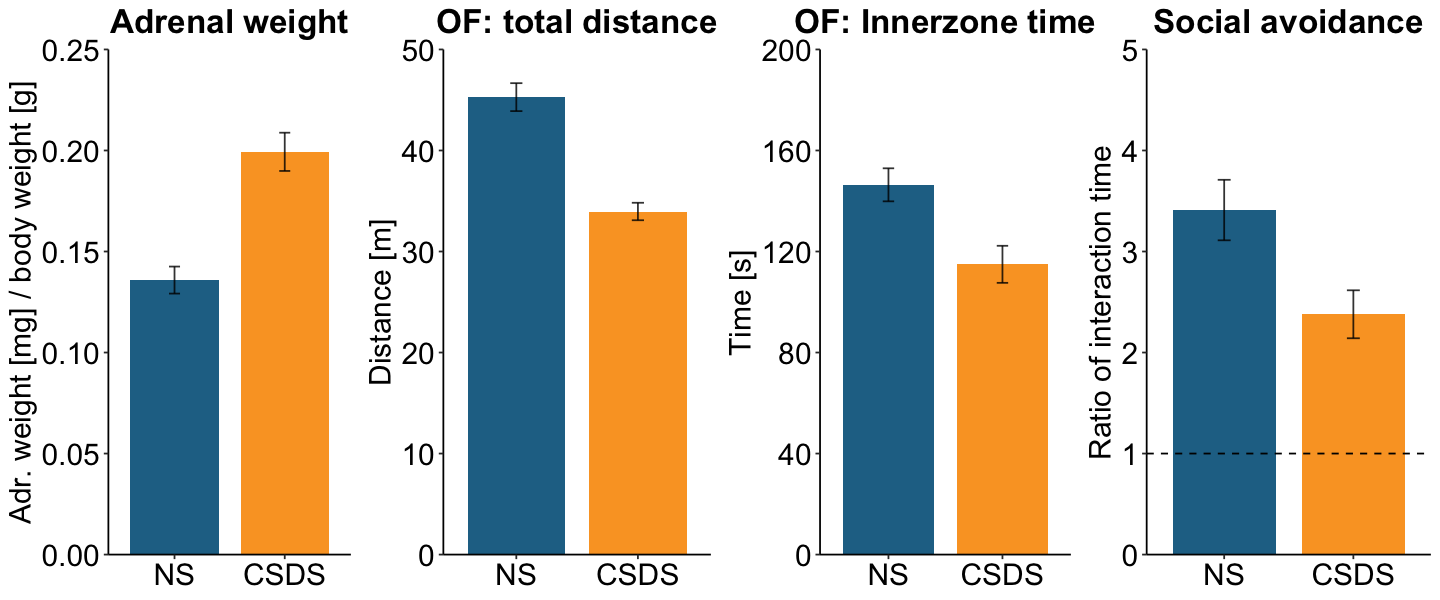

In [14]:
# Figure 2C
yplot = 'Adrenal weight'
ylabel_name = "Adr. weight [mg] / body weight [g]"
p1 <- barplot_standard(data = all_data, xdata = all_data$condition,
                       ydata = all_data$Rel_Adrenal_weight,
                       y_axe_limits = c(0, 0.25), y_axe_breaks = seq(0,0.25,0.05), palette = els_palette)
# Figure 2D
yplot = 'OF: total distance'
ylabel_name = "Distance [m]"
p2 <- barplot_standard(data = all_data, xdata = all_data$condition,
                       ydata = all_data$`OF_Distance [m]`,
                       y_axe_limits = c(0, 50), y_axe_breaks = seq(0,50,10), palette = els_palette)
# Figure 2E
yplot = 'OF: Innerzone time'
ylabel_name = "Time [s]"
p3 <- barplot_standard(data = all_data, xdata = all_data$condition,
                       ydata = all_data$`OF_Inner zone : time [s]`,
                       y_axe_limits = c(0, 200), y_axe_breaks = seq(0,200,40), palette = els_palette)
# Figure 2F
yplot = 'Social avoidance'
ylabel_name = "Ratio of interaction time"
p4 <- barplot_standard(data = all_data, xdata = all_data$condition,
                       ydata = all_data$SA_ratio,
                       y_axe_limits = c(0, 5), y_axe_breaks = seq(0,5,1), palette = els_palette) +
geom_hline(yintercept=1, linetype="dashed")

options(repr.plot.width=12, repr.plot.height=5)
ggarrange(p1,p2,p3,p4, ncol=4, nrow=1)
               

# Figure 3 - Social interaction binning yields more separable PCA projections than the social avoidance 

## Figure 3 A-B

### Statistics 3 A-B

In [15]:
# Prepare data
pca_timebin_totaldur_cdn <- data_timebinduration %>%
  unite(condition_id, ...1, animal_id, remove =T) %>%
  dplyr::select(-c(id, condition)) %>%
  column_to_rownames(var = "condition_id")

In [16]:
# PCA calculation
pca_time <- prcomp(na.omit(pca_timebin_totaldur_cdn), scale = TRUE)
#PCA analysis (prcomp) generates 3 values: x, sdev and rotation. x contains the the principal components for drawing a graph. sdev is the standard deviation and rotation
# to calculate how much variation a PC accounts for use:
pca_time_var <- pca_time$sdev^2 
pca_time_per <- round(pca_time_var/sum(pca_time_var)*100, 1)
# This calculate the e^2 of sdev
# to convert this to %:
pca_time_data <- data.frame(condition=rownames(pca_time$x),
                            X=pca_time$x[,1],
                            Y=pca_time$x[,2])

pca_time_data <- pca_time_data %>%
  separate(condition, c("timebin", "mouse_id"), sep = "_")

Check assumptions for ANOVA analysis

In [17]:
# Check normality
pca_time_data %>%
  group_by(timebin) %>%
  shapiro_test(X) %>%
  add_significance()

timebin variable statistic p            p.signif
1 0       X        0.9698182 1.982219e-01 ns      
2 1       X        0.8676520 3.019833e-05 ****    
3 2       X        0.9146474 1.061085e-03 **      
4 3       X        0.8982227 2.811210e-04 ***

ANOVA repeated measures general effect

In [18]:
pca_stat <- aov(X ~ timebin, pca_time_data)
summary(pca_stat)

             Df Sum Sq Mean Sq F value   Pr(>F)    
timebin       3   77.5  25.835   7.363 0.000103 ***
Residuals   208  729.9   3.509                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Bonferonni post-hoc test

In [19]:
pca_time_data %>%
  pairwise_t_test(
    X ~ timebin, paired = TRUE,
    p.adjust.method = "bonferroni"
  )

.y. group1 group2 n1 n2 statistic df p        p.adj    p.adj.signif
1 X   0      1      53 53 -4.088141 52 1.51e-04 0.000906 ***         
2 X   0      2      53 53 -4.095897 52 1.47e-04 0.000882 ***         
3 X   0      3      53 53 -4.616329 52 2.59e-05 0.000155 ***         
4 X   1      2      53 53 -1.166208 52 2.49e-01 1.000000 ns          
5 X   1      3      53 53 -1.959974 52 5.50e-02 0.332000 ns          
6 X   2      3      53 53 -1.590768 52 1.18e-01 0.708000 ns

### Plot figure 3A

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



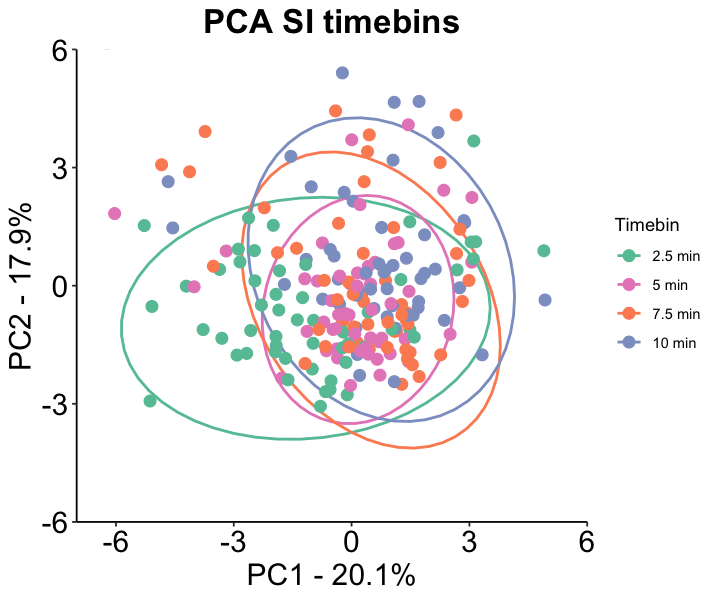

In [20]:
options(repr.plot.width=6, repr.plot.height=5)
# Settings:
yplot = "PCA SI timebins"
timebin_palette = c("#66c2a5", "#e78ac3", "#fc8d62", "#8da0cb")


PCAplot_standard(data = pca_time_data, xdata = pca_time_data$X, ydata = pca_time_data$Y,
                 label = pca_time_data$timebin, labelnames = pca_time_per,
                 y_axe_limits = c(-6, 6), y_axe_breaks = 5,
                 x_axe_limits = c(-7, 6), x_axe_breaks = 5, palette = timebin_palette) +
scale_color_manual(values=timebin_palette,
                   labels=c("0" = "2.5 min", "1" = "5 min", "2" = "7.5 min", "3" = "10 min"),
                   name= "Timebin")

### Plot figure 3B

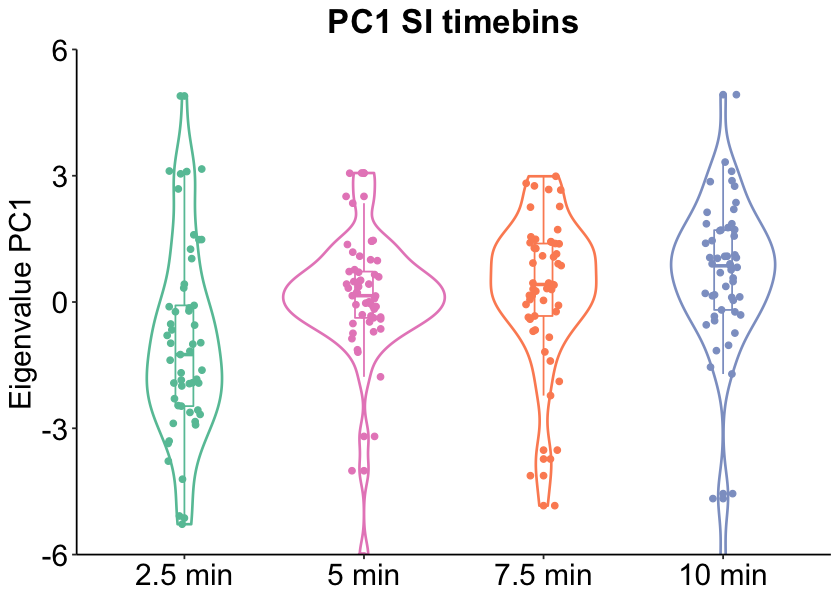

In [21]:
options(repr.plot.width=7, repr.plot.height=5)
# PC1 violin plot eigenvalues
yplot = "PC1 SI timebins"

violinplot_standard(data = pca_time_data, xdata = pca_time_data$timebin,
                    ydata = pca_time_data$X, label = pca_time_data$timebin, y_axe_limits = c(-6, 6),
                    y_axe_breaks = 5, palette = timebin_palette, ylab = "Eigenvalue PC1") +
scale_x_discrete(labels=c("0" = "2.5 min", "1" = "5 min", "2" = "7.5 min", "3" = "10 min"))

## Figure 3C

### Statistics 3C

In [22]:
# Prepare data
pca_otherbeh_data_cdn <- all_data %>%
  dplyr::select(-c(T_climbing_OF:BW_day21)) %>%
  dplyr::select(animal_id:SA_ratio) %>%
  unite(condition_id, condition, animal_id, remove =T) %>%
  column_to_rownames(var = "condition_id")

In [23]:
# PCA calculation
pca_cdn <- prcomp(na.omit(pca_otherbeh_data_cdn), scale = TRUE)
pca_cdn_var <- pca_cdn$sdev^2 
pca_cdn_per <- round(pca_cdn_var/sum(pca_cdn_var)*100, 1)
pca_cdn_data <- data.frame(condition=rownames(pca_cdn$x),
                           X=pca_cdn$x[,1], # PC1
                           Y=pca_cdn$x[,2], # PC2
                           Z=pca_cdn$x[,3]) # PC3

pca_cdn_data <- pca_cdn_data %>%
  separate(condition, c("condition", "mouse_id"), sep = "_")

Check assumptions for independent samples T-test

In [24]:
# Check normality of the data: Shapiro for PC1 (X)
pca_cdn_data %>%
group_by(condition) %>%
shapiro_test(X) %>%
add_significance()

condition   variable statistic p         p.signif
1 Nonstressed X        0.9541530 0.2181118 ns      
2 Stressed    X        0.9610051 0.3479385 ns

In [25]:
# Check equality of the variance: Levene's test for PC1 (X)
pca_cdn_data %>%
levene_test(X ~ condition) %>%
add_significance()

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1 df2 statistic p         p.signif
1 1   57  1.305405  0.2580049 ns

Parametric test: Independent samples T-test

In [26]:
pca_cdn_data %>%
  t_test(X ~ condition, var.equal = TRUE) %>%
  add_significance()

.y. group1      group2   n1 n2 statistic df p       p.signif
1 X   Nonstressed Stressed 30 29 -2.835562 57 0.00632 **

### Plot figure 3C

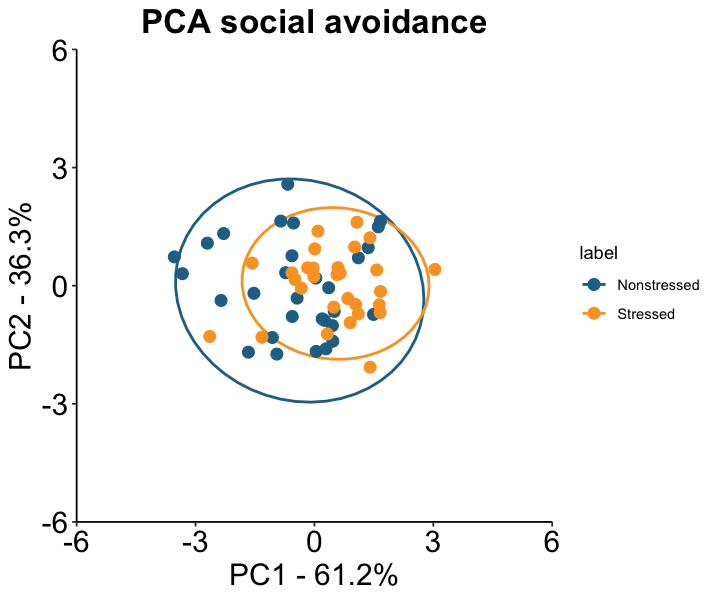

In [27]:
options(repr.plot.width=6, repr.plot.height=5)
yplot = 'PCA social avoidance'
PCAplot_standard(data = pca_cdn_data, xdata = pca_cdn_data$X, ydata = pca_cdn_data$Y,
                 label = pca_cdn_data$condition, labelnames = pca_cdn_per,
                 y_axe_limits = c(-6, 6), y_axe_breaks = 5,
                 x_axe_limits = c(-6, 6), x_axe_breaks = 5, palette = els_palette)

## Figure 3D-E

### Statistics 3D-E

In [28]:
# Prepare data
pca_totaldurfirstbin_cdn <- data_timebinduration %>%
  filter(...1 == 0) %>%
  unite(condition_id, condition, animal_id, remove =T) %>%
  dplyr::select(-c(...1, id)) %>%
  column_to_rownames(var = "condition_id")

In [29]:
# PCA calculation
pca_cdn <- prcomp(na.omit(pca_totaldurfirstbin_cdn), scale = TRUE)
pca_cdn_var <- pca_cdn$sdev^2 
pca_cdn_per <- round(pca_cdn_var/sum(pca_cdn_var)*100, 1)
pca_cdn_data_SI <- data.frame(condition=rownames(pca_cdn$x),
                           X=pca_cdn$x[,1],
                           Y=pca_cdn$x[,2],
                           Z=pca_cdn$x[,3])

pca_cdn_data_SI <- pca_cdn_data_SI %>%
  separate(condition, c("condition", "mouse_id"), sep = "_")

Check assumptions for independent samples T-test

In [30]:
# Check normality of the data: Shapiro for PC1 (X)
pca_cdn_data_SI %>%
group_by(condition) %>%
shapiro_test(X) %>%
add_significance()

condition   variable statistic p          p.signif
1 Nonstressed X        0.9145008 0.03347331 *       
2 Stressed    X        0.9675824 0.53936461 ns

In [31]:
# Check equality of the variance: Levene's test for PC1 (X)
pca_cdn_data_SI %>%
levene_test(X ~ condition) %>%
add_significance()

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1 df2 statistic p          p.signif
1 1   51  6.072166  0.01714376 *

Non-parametric test: Wilcox test

In [32]:
pca_cdn_data_SI %>%
wilcox_test(X ~ condition) %>%
add_significance()

.y. group1      group2   n1 n2 statistic p        p.signif
1 X   Nonstressed Stressed 26 27 654       1.83e-09 ****

### Plot figure 3D

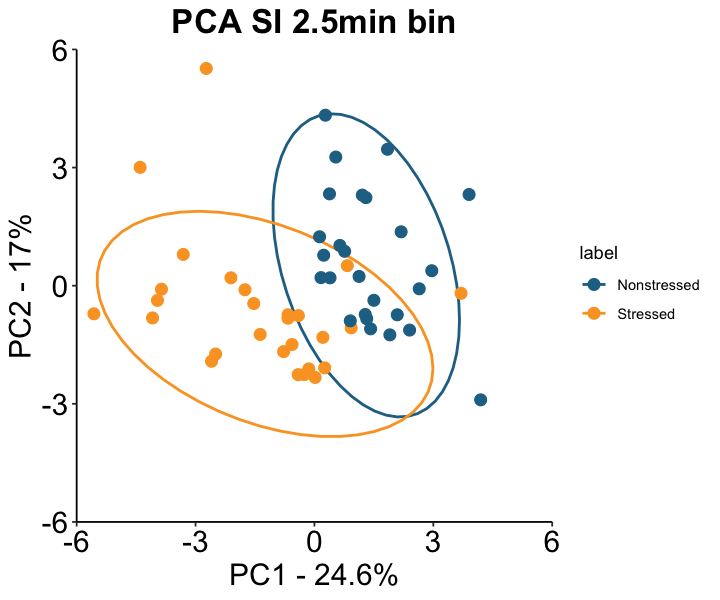

In [33]:
options(repr.plot.width=6, repr.plot.height=5)
yplot = 'PCA SI 2.5min bin'
PCAplot_standard(data = pca_cdn_data_SI, xdata = pca_cdn_data_SI$X, ydata = pca_cdn_data_SI$Y,
                 label = pca_cdn_data_SI$condition, labelnames = pca_cdn_per,
                 y_axe_limits = c(-6, 6), y_axe_breaks = 5,
                 x_axe_limits = c(-6, 6), x_axe_breaks = 5, palette = els_palette)

### Plot figure 3E

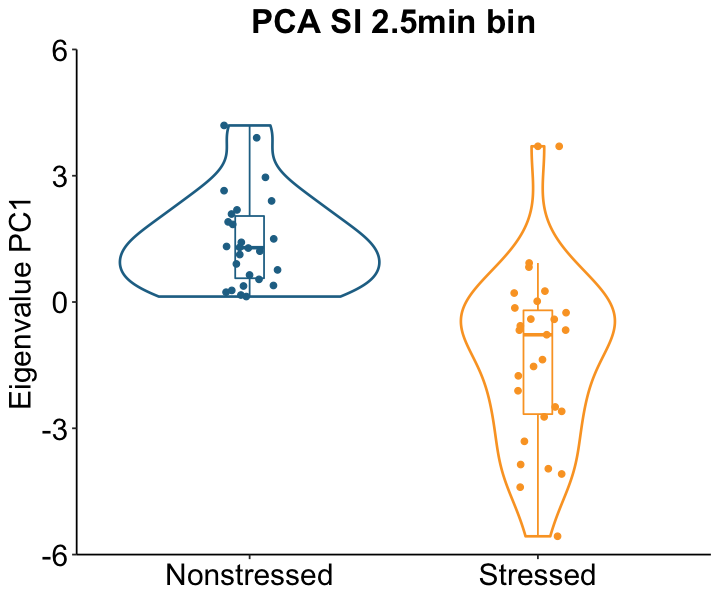

In [34]:
options(repr.plot.width=6, repr.plot.height=5)
violinplot_standard(data = pca_cdn_data_SI, xdata = pca_cdn_data_SI$condition,
                    ydata = pca_cdn_data_SI$X, label = pca_cdn_data_SI$condition, y_axe_limits = c(-6, 6),
                    y_axe_breaks = 5, palette = els_palette, ylab = "Eigenvalue PC1")

## Figure 3F

### Statistics 3F

In [35]:
# Calculate the top contributing behaviors to the variation in PC1 (the eigenvectors/eigenvalues)
loading_scores <- pca_cdn$rotation[,1]
behavior_scores <- abs(loading_scores) ## get the magnitudes as absolute values
behavior_score_ranked <- sort(behavior_scores, decreasing=TRUE)
ranked_pca_behavior <- names(behavior_score_ranked)
#ranked_pca_behavior ## show the names of the top behaviors
ranked_pca_behavior_name <- (pca_cdn$rotation[ranked_pca_behavior,1]) ## show the scores (and +/- sign)
## Setup table to plot
ranked_pca_behavior_name <- (as.data.frame(ranked_pca_behavior_name))
names(ranked_pca_behavior_name)[1] <- "score"
ranked_pca_behavior_name <- rownames_to_column(ranked_pca_behavior_name, var="name") 

ranked_pca_behavior_name$name <- factor(ranked_pca_behavior_name$name, ranked_pca_behavior) #Rank the behaviors based on the absolute values

ranked_pca_behavior_name

name           score       
1  B_lookaround   -0.433113764
2  B_speed         0.419567350
3  B_huddle       -0.361505131
4  B_nose_to_tail  0.352951591
5  B_nose_to_body  0.269422256
6  W_speed         0.265273616
7  W_lookaround   -0.259649559
8  B_dig          -0.181023407
9  W_sniffing     -0.178155878
10 Sidebyside      0.176124052
11 B_climbing      0.150464558
12 W_climbing      0.137568051
13 nose2nose      -0.127864412
14 W_dig          -0.092338497
15 B_sniffing      0.072432359
16 sidereside      0.053221588
17 W_nose2tail     0.020821128
18 W_nose2body     0.015521049
19 W_huddle        0.004031014

### Plot figure  3F

In [36]:
# Prepare figure
ranked_pca_behavior_name <-  ranked_pca_behavior_name[order(abs(ranked_pca_behavior_name$score), decreasing = F), ]

ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'B_lookaround'] <- 'B-look-around'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'B_speed'] <- 'B-speed'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'B_huddle'] <- 'B-huddling'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'B_nose_to_tail'] <- 'B-nose-to-tail'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'B_nose_to_body'] <- 'B-nose-to-body'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'W_speed'] <- 'W-speed'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'W_lookaround'] <- 'W-look-around'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'B_dig'] <- 'B-dig'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'W_sniffing'] <- 'W-sniffing'
ranked_pca_behavior_name$new[ranked_pca_behavior_name$name == 'Sidebyside'] <- 'Side-by-side'

ranked_pca_behavior_name$Sign <-  ifelse(ranked_pca_behavior_name$score < 0, yes = 'negative', no = 'positive')
ranked_pca_behavior_name$Sign <-  factor(ranked_pca_behavior_name$Sign, levels = c('positive', 'negative'))

ranked_pca_behavior_name$new <- factor(ranked_pca_behavior_name$new, levels = ranked_pca_behavior_name$new)

x_axe_breaks = 5

ranked_pca_behavior_name <- ranked_pca_behavior_name %>%
filter(new != "NA")


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


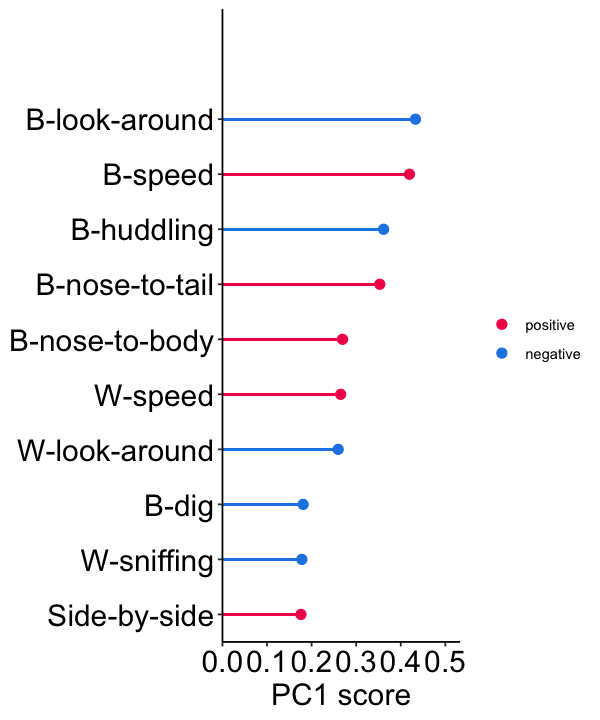

In [37]:
options(repr.plot.width=5, repr.plot.height=6)

ggplot(ranked_pca_behavior_name, aes(x = abs(score),
                                    y = new,
                                    fill = Sign)) +
  geom_bar(stat = 'identity', width = 0.05) +
  geom_point(size = 2.5, pch = 19, alpha = 1, aes(col = Sign)) +
  scale_fill_manual(values = palette_posneg, name = '', guide = F) +
  scale_color_manual(values = palette_posneg, name = '') +
  labs(y = NULL, x = 'PC1 score') + 
  scale_x_continuous(expand = c(0, 0, 0, 0.1), n.breaks = x_axe_breaks) +
  scale_y_discrete(expand = c(0, 0.5, 0, 2)) +
  theme(legend.position = "none") +
  theme(legend.title=element_blank()) +
  theme_classic() +
  theme(axis.text.y = element_text(size = x_y_labelsize, color = "black"), 
        axis.title.y = element_text(size = y_title), 
        axis.title.x=element_text(size = y_title),
        axis.text.x=element_text(size = x_y_labelsize, color = "black"),
        axis.ticks.x = element_line(size = line_sizes)) +
  # labs(title = yplot) +
  theme(plot.title = element_text(hjust = title_location, size = title_size, face = "bold")) +
  theme(axis.line = element_line(colour = 'black', size = line_sizes),
        axis.ticks.y = element_line(size = line_sizes))

# Figure 4 -  Top contributing behaviors of the 2.5 min time bin social interaction task

### Statistics 4A-E

 Student's t-test for comparing the means

In [38]:
# Prepare data, only take first 2.5min timebin data
totaldurfirstbin_cdn <- data_timebinduration %>%
filter(...1 == 0) %>%
dplyr::select(-c(...1, id))

# Put data all in one column
stat_2.5mindura_SI <- totaldurfirstbin_cdn %>%
dplyr::select(-c("animal_id")) %>%
pivot_longer(-condition, names_to = "variables", values_to = "data") %>%
filter(variables == 'B_lookaround' | variables == 'B_huddle' 
       | variables == 'B_speed' | variables == 'B_nose_to_tail' | variables == 'B_nose_to_body')

Check normality of the data: Shapiro

In [39]:
stat_2.5mindura_SI %>%
  group_by(variables) %>%
  shapiro_test(data) %>%
  add_significance()

variables      variable statistic p            p.signif
1 B_huddle       data     0.5823463 4.883193e-11 ****    
2 B_lookaround   data     0.9115259 8.179021e-04 ***     
3 B_nose_to_body data     0.9125222 8.883875e-04 ***     
4 B_nose_to_tail data     0.8571664 1.493750e-05 ****    
5 B_speed        data     0.8969724 2.551114e-04 ***

Check equality of the variance: Levene's test

In [40]:
stat_2.5mindura_SI %>%
  group_by(variables) %>%
  levene_test(data ~ condition) %>%
  add_significance()

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”
Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


variables      df1 df2 statistic  p            p.signif
1 B_huddle       1   51  12.9893201 0.0007108436 ***     
2 B_lookaround   1   51   9.8852523 0.0027768298 **      
3 B_nose_to_body 1   51   0.7261517 0.3981174213 ns      
4 B_nose_to_tail 1   51   4.9208779 0.0310129511 *       
5 B_speed        1   51  13.9975885 0.0004651241 ***

Non-parametric test: Mann whitney wilcoxon test

In [41]:
stat_2.5mindura_SI %>%
group_by(variables) %>%
wilcox_test(data ~ condition) %>%
add_significance()

variables      .y.  group1      group2   n1 n2 statistic p        p.signif
1 B_huddle       data Nonstressed Stressed 26 27 145.5     2.65e-04 ***     
2 B_lookaround   data Nonstressed Stressed 26 27  56.0     6.81e-09 ****    
3 B_nose_to_body data Nonstressed Stressed 26 27 635.0     4.55e-07 ****    
4 B_nose_to_tail data Nonstressed Stressed 26 27 664.0     2.00e-08 ****    
5 B_speed        data Nonstressed Stressed 26 27 573.0     3.92e-05 ****

### Plot figure 4A-E

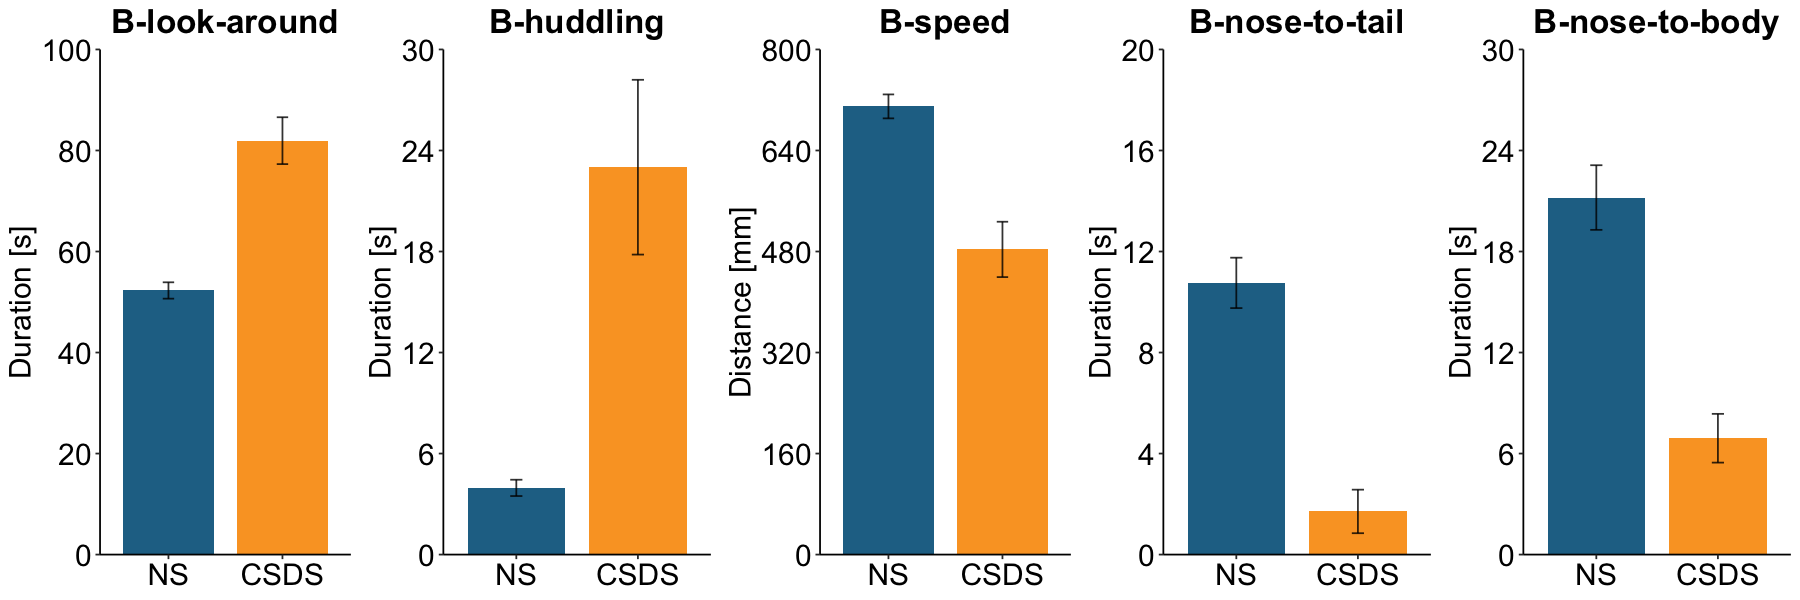

In [42]:
# Figure 4A
yplot = 'B-look-around'
ylabel_name = "Duration [s]"
p1 <- barplot_standard(data = totaldurfirstbin_cdn, xdata = totaldurfirstbin_cdn$condition,
                       ydata = totaldurfirstbin_cdn$B_lookaround,
                       y_axe_limits = c(0, 100), y_axe_breaks = seq(0,100,20), palette = els_palette)

# Figure 4B
yplot = 'B-huddling'
ylabel_name = "Duration [s]"
p2 <- barplot_standard(data = totaldurfirstbin_cdn, xdata = totaldurfirstbin_cdn$condition,
                       ydata = totaldurfirstbin_cdn$B_huddle,
                       y_axe_limits = c(0, 30), y_axe_breaks = seq(0,30,6), palette = els_palette)

# Figure 4C
yplot = 'B-speed'
ylabel_name = "Distance [mm]"
p3 <- barplot_standard(data = totaldurfirstbin_cdn, xdata = totaldurfirstbin_cdn$condition,
                       ydata = totaldurfirstbin_cdn$B_speed,
                       y_axe_limits = c(0, 800), y_axe_breaks = seq(0,800,160), palette = els_palette)

# Figure 4D
yplot = 'B-nose-to-tail'
ylabel_name = "Duration [s]"
p4 <- barplot_standard(data = totaldurfirstbin_cdn, xdata = totaldurfirstbin_cdn$condition,
                       ydata = totaldurfirstbin_cdn$B_nose_to_tail,
                       y_axe_limits = c(0, 20), y_axe_breaks = seq(0,20,4), palette = els_palette)

# Figure 4E
yplot = 'B-nose-to-body'
ylabel_name = "Duration [s]"
p5 <- barplot_standard(data = totaldurfirstbin_cdn, xdata = totaldurfirstbin_cdn$condition,
                       ydata = totaldurfirstbin_cdn$B_nose_to_body,
                       y_axe_limits = c(0, 30), y_axe_breaks = seq(0,30,6), palette = els_palette)

options(repr.plot.width=15, repr.plot.height=5)
ggarrange(p1,p2,p3,p4,p5, ncol=5, nrow=1)

# Figure 5

## Figure 5A

### Statistics 5A

Make Z-score for stress physiology

In [43]:
# Filter data to necessary parts for Z-score analysis

z_scoredata_phy <- all_data %>%
  dplyr::select(animal_id, condition, Rel_Adrenal_weight, BW_day21)

# Create the average of the "control = nonstressed" group for the Z-score calculation
z_mean_ctr <- z_scoredata_phy %>%
  filter(condition == "Nonstressed") %>%
  dplyr::select(Rel_Adrenal_weight, BW_day21) %>%
  summarise(across(c(Rel_Adrenal_weight:BW_day21), ~ mean(.x, na.rm = TRUE)))

# Create the standard deviation of the "control = nonstressed" group for the Z-score calculation
z_std_ctr <- z_scoredata_phy %>%
  filter(condition == "Nonstressed") %>%
  dplyr::select(Rel_Adrenal_weight, BW_day21) %>%
  summarise(across(c(Rel_Adrenal_weight:BW_day21), ~ sd(.x, na.rm = TRUE)))

# Calculate the Z-score values for the stress physiology tests
for (i in 3:ncol(z_scoredata_phy)) {
  z_scoredata_phy[ , i] <- (z_scoredata_phy[ , i] - z_mean_ctr[[i-2]]) / z_std_ctr[[i-2]]
}

# Add up the two Z-scores for total Z-score of stress physiology
z_scoredata_phy$Total_zscore = (z_scoredata_phy$Rel_Adrenal_weight + z_scoredata_phy$BW_day21) / 2

Pearson correlation analysis between the SA-ratio and Z-score stress physiology

In [44]:
# Filter Social avoidance data out
corr_zscore_SA <- all_data %>%
  dplyr::select(c(animal_id, condition, SA_ratio))

# Join data between z-score stress physiology and social avoidance data
corr_zscore_SA = plyr::join(z_scoredata_phy, corr_zscore_SA)

# Excluding outliers on the residuals
model = lm(SA_ratio~Total_zscore, data=corr_zscore_SA) # Fitting a linear model between SA_ratio and z-score stress phys.
rownames(corr_zscore_SA) = 1:dim(corr_zscore_SA)[1]
corr_zscore_SA = subset(merge(x = corr_zscore_SA, y = as.data.frame(resid(model)), by = 0, all = TRUE), select=-c(Row.names))

Outlier_SA_number <- corr_zscore_SA # to create copy of dataframe to use for outlier visualization in the next cell

# Exlude the actual outliers values
corr_zscore_SA = corr_zscore_SA[corr_zscore_SA[,"resid(model)"] <= 5,]
corr_zscore_SA = corr_zscore_SA[corr_zscore_SA[,"resid(model)"] >= -5,]


# Pearson correlation analysis 
cor.test(corr_zscore_SA$Total_zscore, corr_zscore_SA$SA_ratio, 
                method = "pearson")

Joining by: animal_id, condition




	Pearson's product-moment correlation

data:  corr_zscore_SA$Total_zscore and corr_zscore_SA$SA_ratio
t = -1.7289, df = 56, p-value = 0.08934
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.45683532  0.03524377
sample estimates:
       cor 
-0.2251012 


In [45]:
# Show the number of outliers
out1 = sum(Outlier_SA_number[,"resid(model)"] > 5, na.rm = TRUE) # Outliers above 5
out2 = sum(Outlier_SA_number[,"resid(model)"] < -5, na.rm = TRUE) # Outliers under -5
numoutliers = sum(out1, out2)
print(numoutliers)

[1] 0


### Plot figure 5A

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


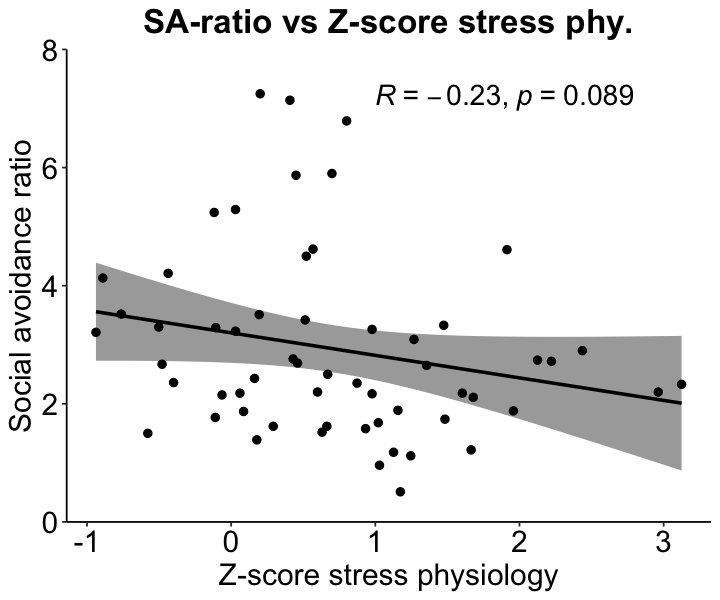

In [46]:
options(repr.plot.width=6, repr.plot.height=5)

yplot = "SA-ratio vs Z-score stress phy."

scatter_standard(data = corr_zscore_SA, xdata = 'Total_zscore',
                 ydata = 'SA_ratio', y_axe_limits = c(0, 8),
                 y_axe_breaks = seq(0,8,2), xlab = 'Z-score stress physiology',
                 ylab = 'Social avoidance ratio') 

## Figure 5B

### Statistics 5B

Make Z-score for top 5 DeepOF supervised behavioral classifiers

In [47]:
# Filter data out only the first 2.5min time bin
z_scoredata_SI <- data_timebinduration %>%
  filter(...1 == 0)

# Take only the important columns
z_scoredata_SInew <- z_scoredata_SI[,c(1,21,22,23, 2:20)]

# Create the average of the "control = nonstressed" group for the Z-score calculation
z_mean_ctr <- z_scoredata_SInew %>%
  filter(condition == "Nonstressed") %>%
  summarise(across(c(nose2nose:W_speed), ~ mean(.x, na.rm = TRUE)))

# Create the standard deviation of the "control = nonstressed" group for the Z-score calculation
z_std_ctr <- z_scoredata_SInew %>%
  filter(condition == "Nonstressed") %>%
  summarise(across(c(nose2nose:W_speed), ~ sd(.x, na.rm = TRUE)))

# Calculate the Z-score values for all supervised behavioral classifiers tests
for (i in 5:ncol(z_scoredata_SInew)) {
  z_scoredata_SInew[ , i] <- (z_scoredata_SInew[ , i] - z_mean_ctr[[i-4]]) / z_std_ctr[[i-4]]
}

# Filter for the 5 most top contributing behaviors: B_nose2tail, B_nose2body, B_huddle, B_speed, B_lookaround
Z_scoretotal_SI_5 <- z_scoredata_SInew %>%
  dplyr::select(c(...1:animal_id, B_nose_to_tail, B_nose_to_body, B_climbing, B_huddle, B_speed, B_lookaround))

# Fix orientation of the Z-score test per classifier
z_score_SI_5_new <- Z_scoretotal_SI_5
z_score_SI_5_new$B_nose_to_tail <- Z_scoretotal_SI_5$B_nose_to_tail * -1 # to create positive value
z_score_SI_5_new$B_nose_to_body <- Z_scoretotal_SI_5$B_nose_to_body * -1 # to create positive value
z_score_SI_5_new$B_climbing <- Z_scoretotal_SI_5$B_climbing * -1 # to create positive value
z_score_SI_5_new$B_speed <- Z_scoretotal_SI_5$B_speed * -1 # to create positive value

#Creating the full z_score for SI based on the 5 behaviors:
z_score_SI_5_new$Total_zscore_SI = (z_score_SI_5_new$B_nose_to_tail + z_score_SI_5_new$B_nose_to_body + 
                                   z_score_SI_5_new$B_huddle + z_score_SI_5_new$B_speed +
                                    z_score_SI_5_new$B_lookaround) / 5

Pearson correlation analysis between the Z-score stress physiology and Z-score social interaction task

In [48]:
corr_zscore_SI_phy = plyr::join(z_scoredata_phy, z_score_SI_5_new)

# Excluding outliers on the residuals
model = lm(Total_zscore_SI~Total_zscore, data=corr_zscore_SI_phy)
rownames(corr_zscore_SI_phy) = 1:dim(corr_zscore_SI_phy)[1]
corr_zscore_SI_phy = subset(merge(x = corr_zscore_SI_phy, y = as.data.frame(resid(model)), by = 0, all = TRUE), select=-c(Row.names))

Outlier_phy_number <- corr_zscore_SI_phy # to create copy of dataframe to use for outlier visualization in the next cell

# Exlude the actual outliers values
corr_zscore_SI_phy = corr_zscore_SI_phy[corr_zscore_SI_phy[,"resid(model)"] <= 5,]
corr_zscore_SI_phy = corr_zscore_SI_phy[corr_zscore_SI_phy[,"resid(model)"] >= -5,]

cor.test(corr_zscore_SI_phy$Total_zscore, corr_zscore_SI_phy$Total_zscore_SI, 
                method = "pearson")

Joining by: animal_id, condition




	Pearson's product-moment correlation

data:  corr_zscore_SI_phy$Total_zscore and corr_zscore_SI_phy$Total_zscore_SI
t = 3.1114, df = 45, p-value = 0.00323
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1519521 0.6316095
sample estimates:
      cor 
0.4207588 


In [49]:
# Show the number of outliers
out1 = sum(Outlier_phy_number[,"resid(model)"] > 5, na.rm = TRUE) # Outliers above 5
out2 = sum(Outlier_phy_number[,"resid(model)"] < -5, na.rm = TRUE) # Outliers under -5
numoutliers = sum(out1, out2)
print(numoutliers)

[1] 5


### Plot figure 5B

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'Z−score SI' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'Z−score SI' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'Z−score SI' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'Z−score SI' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehle

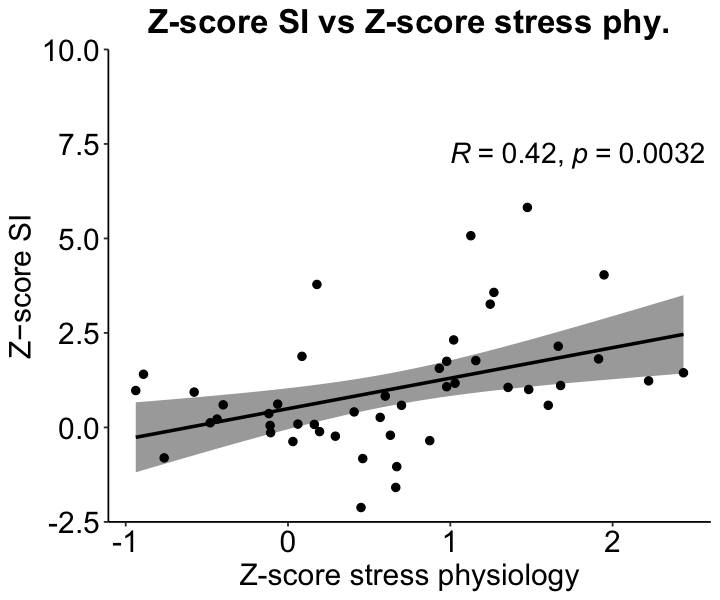

In [50]:
options(repr.plot.width=6, repr.plot.height=5)

yplot = "Z-score SI vs Z-score stress phy."

scatter_standard(data = corr_zscore_SI_phy, xdata = 'Total_zscore',
                 ydata = 'Total_zscore_SI', y_axe_limits = c(-2.5, 10),
                 y_axe_breaks = seq(-2.5,10,2.5), xlab = 'Z-score stress physiology',
                 ylab = 'Z−score SI') 

## Figure 5C

## Statistics 5C 

In [51]:
# Select data: the z-scores stress physiology and the social interaction task
zscore_lollipop <- corr_zscore_SI_phy %>%
  dplyr::select(animal_id, condition, Total_zscore, Total_zscore_SI) %>%
  rename(Total_zscore_phy = Total_zscore)

# Select all the behavioral and physiological parameters
lollipop_data = plyr::join(all_data, zscore_lollipop) %>%
  unite(condition_id, condition, animal_id, remove =T) %>%
  column_to_rownames(var = "condition_id") %>%
  dplyr::select(-c(F_climbing_OF:F_sniffing_OF, 'OF_Outer zone : entries', 'OF_Outer zone : time [s]', 
            SA_tot_dur_nonsocial, SA_tot_dur_social)) %>%
  rename(Climbing_OF = T_climbing_OF) %>% rename(Sniffing_OF = T_sniffing_OF) %>% rename(Huddling_OF = T_huddle_OF) %>%
  rename(Digging_OF = T_dig_OF) %>% rename('Look-around_OF' = T_lookaround_OF) %>% rename(Speed_OF = T_speed_OF) %>%
  rename(Rel_adrenal_weight = Rel_Adrenal_weight) %>% rename(Body_weight_Day1 = BW_day1) %>% rename(Body_weight_Day4 = BW_day4) %>%
  rename(Body_weight_Day8 = BW_day8) %>% rename(Body_weight_Day11 = BW_day11) %>% rename(Body_weight_Day15 = BW_day15) %>%
  rename(Body_weight_Day18 = BW_day18) %>% rename(Body_weight_Day21 = BW_day21) %>% rename(Social_avoidance_ratio = SA_ratio) %>%
  rename(Inner_zone_entries_OF = 'OF_Inner zone : entries') %>% rename(Inner_zone_time_OF = 'OF_Inner zone : time [s]') %>%
  rename('Distance[m]_OF' = 'OF_Distance [m]')


# Do the correlation analysis all against all
corr_matrix_all <- rcorr(as.matrix(lollipop_data))

corr_matrix_r <- corr_matrix_all$r
corr_matrix_p <- corr_matrix_all$P

# Use flattenCorrMatrix function (see functions sheet) to get data out
corr_data_final <- flattenCorrMatrix(corr_matrix_all$r, corr_matrix_all$P)

# Filter out correlations only with the Z-score of the social interaction task
corr_zscore2.5_SI <- corr_data_final %>%
  filter(column == 'Total_zscore_SI' | row == 'Total_zscore_SI')

corr_zscore2.5_SI

Joining by: animal_id, condition



row                    column          cor          p          
1  Climbing_OF            Total_zscore_SI -0.025452371 0.865150589
2  Sniffing_OF            Total_zscore_SI  0.452583522 0.001402652
3  Huddling_OF            Total_zscore_SI -0.133594746 0.370659237
4  Digging_OF             Total_zscore_SI -0.256257015 0.082093511
5  Look-around_OF         Total_zscore_SI  0.269569421 0.066892452
6  Speed_OF               Total_zscore_SI -0.392075703 0.006417822
7  Rel_adrenal_weight     Total_zscore_SI  0.297996637 0.041908360
8  Body_weight_Day1       Total_zscore_SI -0.272341530 0.064028452
9  Body_weight_Day4       Total_zscore_SI -0.338318987 0.020018746
10 Body_weight_Day8       Total_zscore_SI -0.353012146 0.014937592
11 Body_weight_Day11      Total_zscore_SI -0.241314194 0.102244450
12 Body_weight_Day15      Total_zscore_SI -0.074021930 0.620965005
13 Body_weight_Day18      Total_zscore_SI  0.006824752 0.963685865
14 Body_weight_Day21      Total_zscore_SI  0.231644588 0.117183294
15 Social_avoidance_ratio Total_zscore_SI -0.260353418 0.080553479
16 Distance[m]_OF         Total_zscore_SI -0.401390211 0.005168366
17 Inner_zone_entries_OF  Total_zscore_SI -0.308892561 0.034634647
18 Inner_zone_time_OF     Total_zscore_SI -0.230510279 0.119038867
19 Total_zscore_phy       Total_zscore_SI  0.420758835 0.003230049

## Plot figure 5C

In [52]:
# Set the data in the correct way
corr_zscore2.5_SI <-  corr_zscore2.5_SI[order(abs(corr_zscore2.5_SI$cor), decreasing = F), ]

corr_zscore2.5_SI$Sign <-  ifelse(corr_zscore2.5_SI$cor < 0, yes = 'negative', no = 'positive')
corr_zscore2.5_SI$Sign <-  factor(corr_zscore2.5_SI$Sign, levels = c('positive', 'negative'))

corr_zscore2.5_SI$Sig <- p.adjust(corr_zscore2.5_SI$p, method = 'bonferroni') <= 0.05

corr_zscore2.5_SI$row <- factor(corr_zscore2.5_SI$row, levels = corr_zscore2.5_SI$row)


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


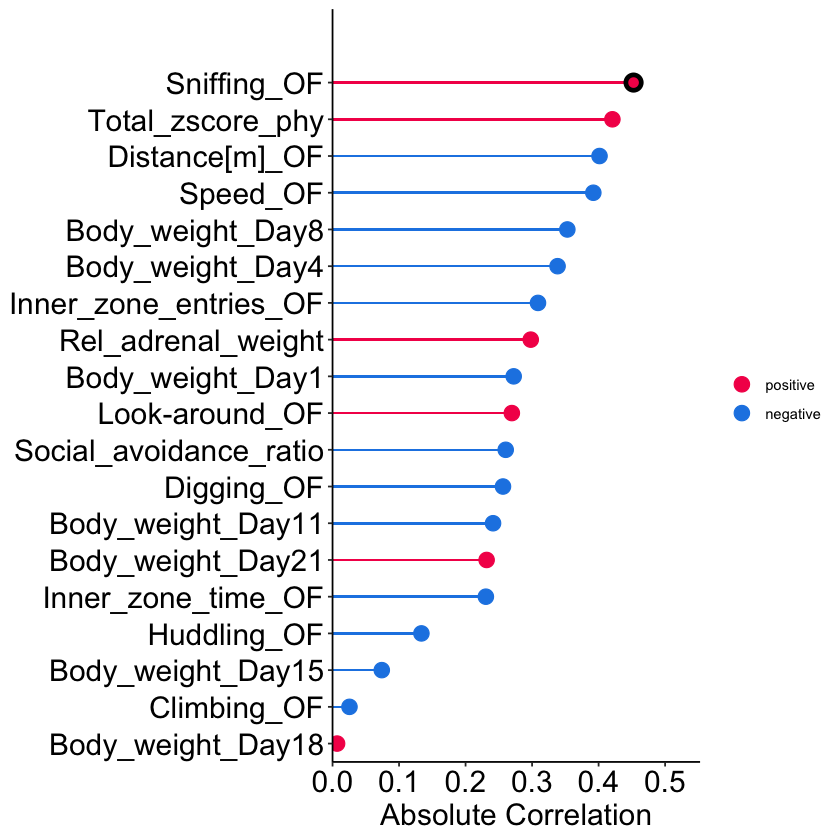

In [53]:
options(repr.plot.width=7, repr.plot.height=7)

lollipop_corr(data = corr_zscore2.5_SI, x_axe_breaks = 5 )